# Titanic - Machine Learning from Disaster
### New Jersey Institute of Technology 
### Machine Learing Final Project
### By:-
**1. Ayush Vashistha-av64**

**2. Harshvardhan Lad-hsl6**

**3. PavitPaulSingh Matharu-pm66**

**4. Vedant Kadu-vk63**

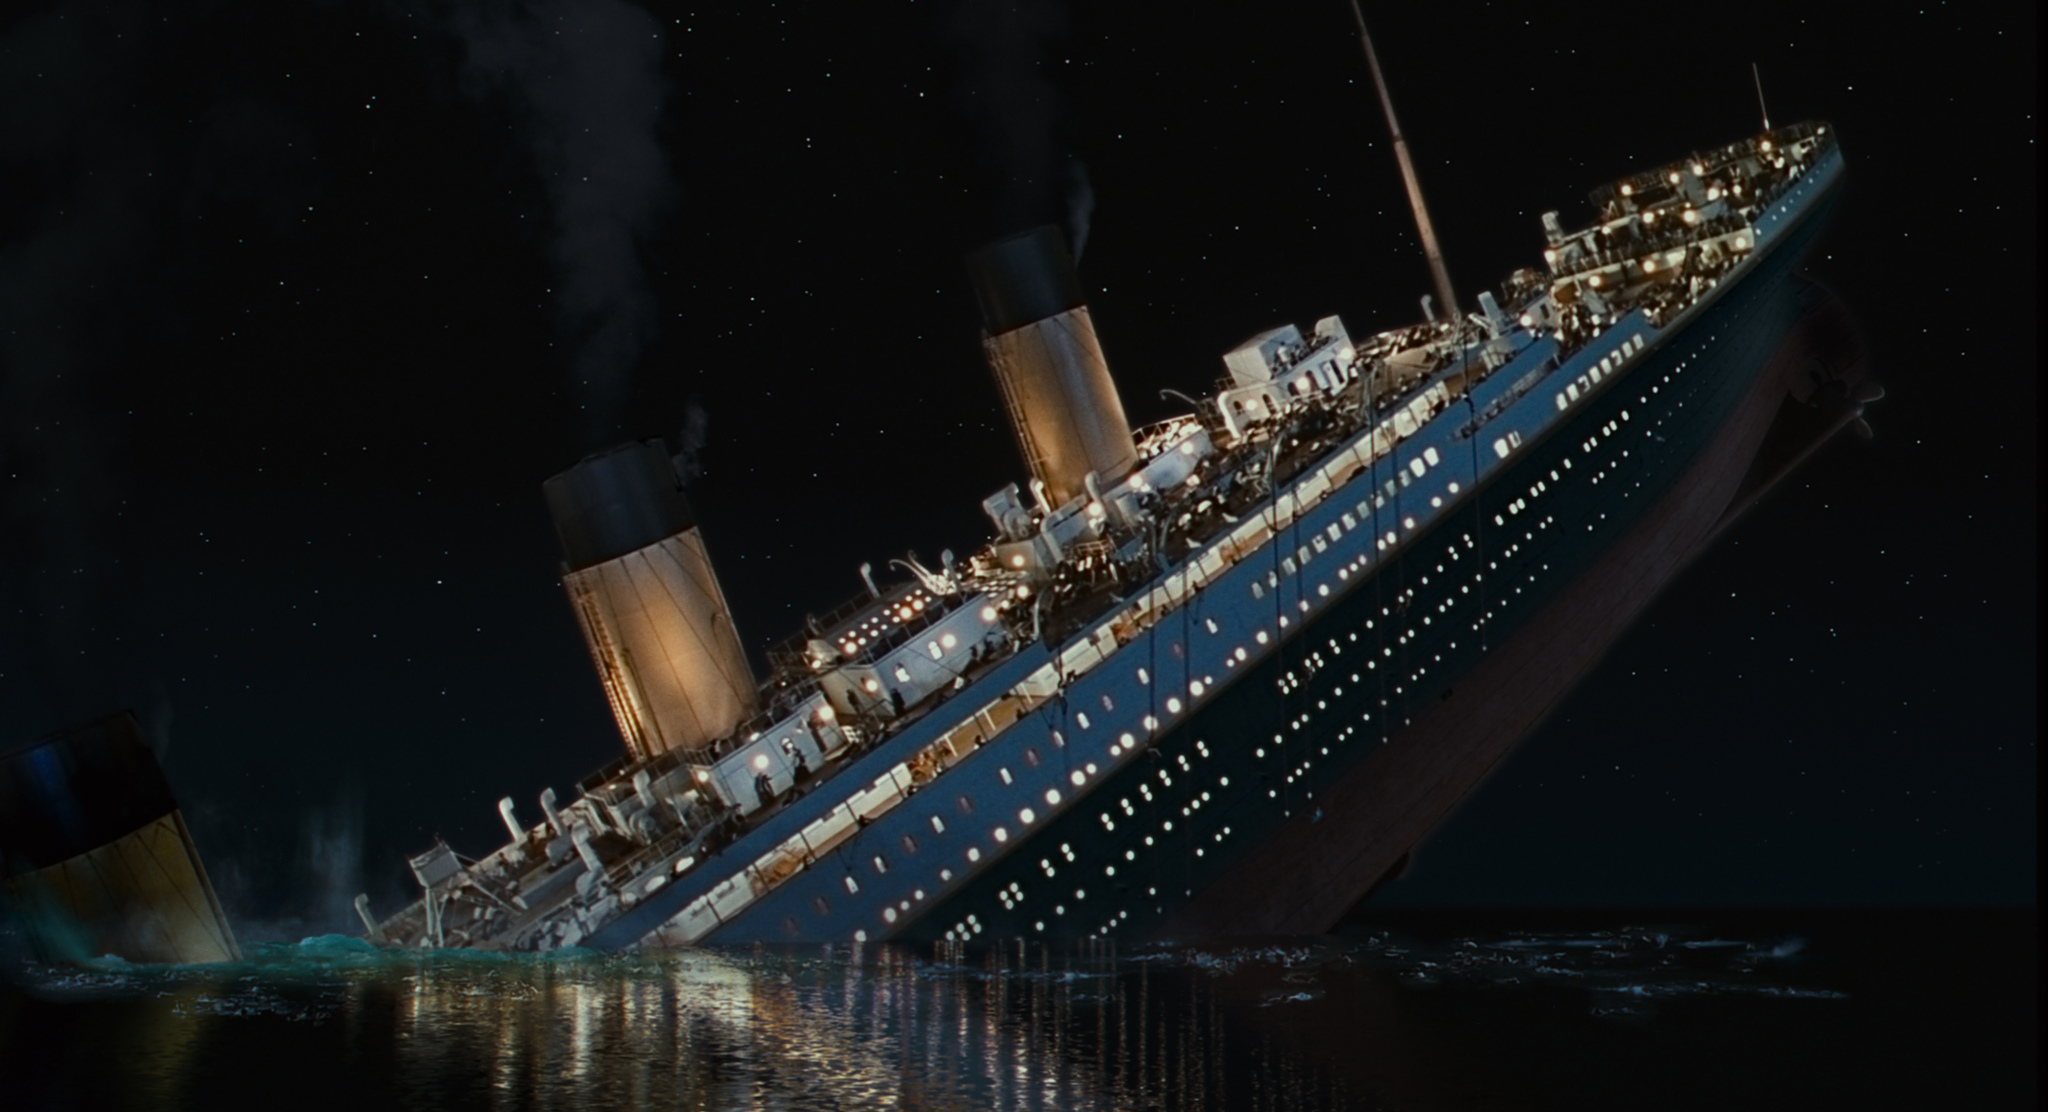

## Workflow stages

The competition solution workflow goes through following stages described in the Notebook.

* Question or problem definition.

* Acquire training and testing data.

* Wrangle, prepare, cleanse the data.

* Analyze, identify patterns, and explore the data.

* Model, predict and solve the problem.

* Visualize, report, and present the problem solving steps and final solution.

* Supply or submit the results.

In [81]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import os
for dirname, _, filenames in os.walk('/kaggle/input/titanic/train.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## 1.Problem Defination

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we are trying to build a predictive model that answers the question: 
* what sorts of people were more likely to survive? 
using passenger data (ie name, age, gender, socio-economic class, etc).

## 2.Acquire training and testing data.

The Python Pandas packages helps us work with our datasets. We start by acquiring the training and testing datasets into Pandas DataFrames. We can also combine these datasets to run certain operations on both datasets together. But I have kept these two dataset seprate to avoid errors.

In [82]:
import pandas as pd
train=pd.read_csv(r"F://Dataset/MLtrain.csv")
test=pd.read_csv(r"F://Dataset/MLtest.csv")

In [83]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [84]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## 3.Wrangle, prepare, cleanse the data.


Handling missing data - imputation and filtering

Handling Outliers

Binning

One-Hot Encoding

Combining / Splitting

##### Handling missing data - imputation and filtering

In [85]:
train.isnull().mean()< 0.3

PassengerId     True
Survived        True
Pclass          True
Name            True
Sex             True
Age             True
SibSp           True
Parch           True
Ticket          True
Fare            True
Cabin          False
Embarked        True
dtype: bool

In [86]:
train.isnull().mean() < 0.3  #Dropping columns with missing value rate higher than threshold
train=train[train.columns[train.isnull().mean() < 0.3]]
test=test[test.columns[test.isnull().mean() < 0.3]]

In [87]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 32.7+ KB


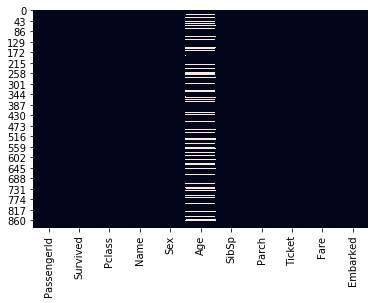

In [88]:
import seaborn as sns
sns.heatmap(train.isnull(), cbar=False)

In [89]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [90]:
train['Embarked'].fillna(train['Embarked'].mode(),inplace=True)
test['Embarked'].fillna(test['Embarked'].mode(),inplace=True)

##### Missing Value
Filling the missing values with the median 

In [91]:
train['Age'].fillna(train['Age'].median(),inplace=True)
test['Age'].fillna(test['Age'].median(),inplace=True)

In [92]:
train=train.dropna()


In [93]:
test['Fare'].fillna(test['Fare'].median(),inplace=True)


In [94]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

##### 2. Handling Outliers

An outlier is an observation that lies an abnormal distance from other values in a random sample from a population.

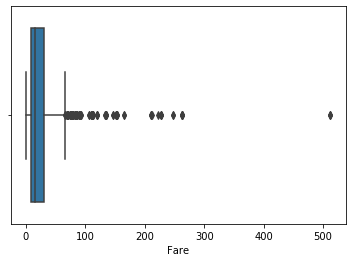

In [95]:
import seaborn as sns
sns.boxplot(x=train['Fare'])

In [96]:
upper_lim = train['Fare'].quantile(.95)
lower_lim = train['Fare'].quantile(.05) # Top 5% means here the values that are out of the 95th percentile of data
train[(train['Fare'] < upper_lim) & (train['Fare'] > lower_lim)]

upper_lim = test['Fare'].quantile(.95)
lower_lim = test['Fare'].quantile(.05)
test[(test['Fare'] < upper_lim) & (test['Fare'] > lower_lim)].head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,S


##### Binning 
The motivation of binning is to make the model more robust and prevent overfitting.

In [22]:
train['Age_Bins'] = pd.cut(x=train['Age'], bins=[0,9, 19, 29, 39, 49,59,69,79,89,99])
test['Age_Bins'] = pd.cut(x=test['Age'], bins=[0,9, 19, 29, 39, 49,59,69,79,89,99])
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Bins
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,"(19, 29]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,"(29, 39]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,"(19, 29]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,"(29, 39]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,"(29, 39]"


##### Label Encoding
1.The main idea behind this method is to changes categorical data to numerical data so that the data is easier for algorithm

2.Label encoding doesn't lose information.

3.This method spreads the values in a column to multiple flag columns and assigns 0 or 1 to them.

In [23]:
from sklearn.preprocessing import LabelEncoder
train['Sex'] = LabelEncoder().fit_transform(train['Sex'])
test['Sex'] = LabelEncoder().fit_transform(test['Sex'])

train['Embarked'] = LabelEncoder().fit_transform(train['Embarked'])
test['Embarked'] = LabelEncoder().fit_transform(test['Embarked'])

In [24]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Bins
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2,"(19, 29]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0,"(29, 39]"
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2,"(19, 29]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,"(29, 39]"
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2,"(29, 39]"


##### Splitting
seperating the Ticket into ticket number

In [25]:
train = train[train['Ticket'] != 'LINE']
train = train.reset_index(drop=True)
t=train['Ticket'].str.split(',?\s+', expand=True)

In [26]:
c=0
q=[]
t=train['Ticket'].str.split(',?\s+', expand=True)
for i in range(len(t)):
    if t[1][i]==None and t[2][i]==None:
        q.append(t[0][i])
        c=c+1
    elif t[2][i]==None:
        c=c+1
        q.append(t[1][i])
    else:
        q.append(t[2][i])
        c=c+1
print(c)
train['Ticket']=q
train.head()

885


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Bins
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,21171,7.2500,2,"(19, 29]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,17599,71.2833,0,"(29, 39]"
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,3101282,7.9250,2,"(19, 29]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,"(29, 39]"
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2,"(29, 39]"


In [27]:
test = test[test['Ticket'] != 'LINE']
test = test.reset_index(drop=True)
t=test['Ticket'].str.split(',?\s+', expand=True)

In [28]:
c=0
q=[]
t=test['Ticket'].str.split(',?\s+', expand=True)
for i in range(len(t)):
    if t[1][i]==None and t[2][i]==None:
        q.append(t[0][i])
        c=c+1
    elif t[2][i]==None:
        c=c+1
        q.append(t[1][i])
    else:
        q.append(t[2][i])
        c=c+1
print(c)
test['Ticket']=q
test.head()

418


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Bins
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,1,"(29, 39]"
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,2,"(39, 49]"
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,1,"(59, 69]"
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,2,"(19, 29]"
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,2,"(19, 29]"


#### Creating New Features
Status is person's name's status 

In [29]:
train['Status'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test['Status'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [30]:
train.Status.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [31]:
train['Status'] = train['Status'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train['Status'] = train['Status'].replace('Mlle', 'Miss')
train['Status'] = train['Status'].replace('Ms', 'Miss')
train['Status'] = train['Status'].replace('Mme', 'Mrs')
test['Status'] = test['Status'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test['Status'] = test['Status'].replace('Mlle', 'Miss')
test['Status'] = test['Status'].replace('Ms', 'Miss')
test['Status'] = test['Status'].replace('Mme', 'Mrs')

In [32]:
train['Status'] = LabelEncoder().fit_transform(train['Status'])
test['Status'] = LabelEncoder().fit_transform(test['Status'])

#### New Feature 
Family size = SibSp + Parch

In [33]:
train['FamilySize'] = train ['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test ['SibSp'] + test['Parch'] + 1

In [34]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Bins,Status,FamilySize
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,1,"(29, 39]",2,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,2,"(39, 49]",3,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,1,"(59, 69]",2,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,2,"(19, 29]",2,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,2,"(19, 29]",3,3


#### New Feature IsAlone tell if the passenger was travling alone or not

In [35]:
train['IsAlone'] =0
for i in range(len(train['SibSp'])):
    if train['SibSp'].iloc[i]+train['Parch'].iloc[i]==0:
        train['IsAlone'][i] = 1
    else:
        train['IsAlone'][i] = 0

C:\Users\vedant\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\vedant\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [36]:
test['IsAlone'] =0
for i in range(len(test['SibSp'])):
    if test['SibSp'].iloc[i]+test['Parch'].iloc[i]==0:
        test['IsAlone'][i] = 1
    else:
        test['IsAlone'][i] = 0

C:\Users\vedant\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\vedant\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## 4. Analyze, identify patterns, and explore the data
### Dimensionality Reduction

#### The Curse of Dimensionality

To start a ML project, we tend to add as many features as possible at the beginning, to get a better model.
However at some point, the performance of the model will decrease with the increasing number of elements.

#### Why does this happen?

Sample density decreases exponentially with the increase of the dimensionality
The dimensionality of the feature space grows and becomes sparser
Machine learning models tend to overfit sparse data.


1. Correlation check
2. Decision Tree (Random Forest) Feature Importances

In [37]:
train=train.drop('Name',axis=1)
test=test.drop('Name',axis=1)

#### 2. Correlation check
If a variable has a very low co relation witht the target, you can drop that feature.

In [38]:
corr=train.corr()

In [39]:
corr[abs(corr['Survived'])<0.01].index

Index(['PassengerId'], dtype='object')

In [40]:
#fi=test["PassengerId"]
train=train.drop('PassengerId',axis=1)
#test=test.drop('PassengerId',axis=1)

In [41]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Bins,Status,FamilySize,IsAlone
0,0,3,1,22.0,1,0,21171,7.2500,2,"(19, 29]",2,2,0
1,1,1,0,38.0,1,0,17599,71.2833,0,"(29, 39]",3,2,0
2,1,3,0,26.0,0,0,3101282,7.9250,2,"(19, 29]",1,1,1
3,1,1,0,35.0,1,0,113803,53.1000,2,"(29, 39]",3,2,0
4,0,3,1,35.0,0,0,373450,8.0500,2,"(29, 39]",2,1,1


In [42]:
train = train[train['Ticket'] != 'LINE']
te=list(train['Ticket'].unique())
for i in range(len(te)):
    train['Ticket'][i]=int(te[i])
train['Ticket']=pd.to_numeric(train['Ticket'])
train.info()

C:\Users\vedant\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 885 entries, 0 to 884
Data columns (total 13 columns):
Survived      885 non-null int64
Pclass        885 non-null int64
Sex           885 non-null int32
Age           885 non-null float64
SibSp         885 non-null int64
Parch         885 non-null int64
Ticket        885 non-null int64
Fare          885 non-null float64
Embarked      885 non-null int32
Age_Bins      885 non-null category
Status        885 non-null int32
FamilySize    885 non-null int64
IsAlone       885 non-null int64
dtypes: category(1), float64(2), int32(3), int64(7)
memory usage: 120.5 KB


In [43]:
test = test[test['Ticket'] != 'LINE']
te=list(test['Ticket'].unique())
for i in range(len(te)):
    test['Ticket'][i]=int(te[i])
test['Ticket']=pd.to_numeric(test['Ticket'])
test.info()

C:\Users\vedant\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 13 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int32
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null int64
Fare           418 non-null float64
Embarked       418 non-null int32
Age_Bins       418 non-null category
Status         418 non-null int32
FamilySize     418 non-null int64
IsAlone        418 non-null int64
dtypes: category(1), float64(2), int32(3), int64(7)
memory usage: 58.1 KB


In [44]:
Age_Bins=train['Age_Bins']
Age_Bins=test['Age_Bins']

In [45]:
train=train.drop('Age_Bins',axis=1)
test=test.drop('Age_Bins',axis=1)

In [46]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Status,FamilySize,IsAlone
0,0,3,1,22.0,1,0,21171,7.2500,2,2,2,0
1,1,1,0,38.0,1,0,17599,71.2833,0,3,2,0
2,1,3,0,26.0,0,0,3101282,7.9250,2,1,1,1
3,1,1,0,35.0,1,0,113803,53.1000,2,3,2,0
4,0,3,1,35.0,0,0,373450,8.0500,2,2,1,1


#### 2. Decision Tree (Random Forest) Feature Importances
Random Forest can be used for feature selection.
It has in-built feature importance.

In [47]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Status,FamilySize,IsAlone
0,0,3,1,22.0,1,0,21171,7.2500,2,2,2,0
1,1,1,0,38.0,1,0,17599,71.2833,0,3,2,0
2,1,3,0,26.0,0,0,3101282,7.9250,2,1,1,1
3,1,1,0,35.0,1,0,113803,53.1000,2,3,2,0
4,0,3,1,35.0,0,0,373450,8.0500,2,2,1,1


In [48]:
from sklearn.ensemble import RandomForestRegressor
train_dummies = pd.get_dummies(train)
df=train_dummies.drop(['Survived'], axis=1).copy()
model = RandomForestRegressor(random_state=1, max_depth=10)
model.fit(df,train_dummies.Survived)
dict(reversed(sorted(zip(model.feature_importances_, df.columns.values))))

C:\Users\vedant\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


{0.3426553735767135: 'Sex',
 0.15609896269173693: 'Fare',
 0.14880136717254755: 'Ticket',
 0.1335816315337818: 'Age',
 0.0937455711014117: 'Pclass',
 0.03466020509864819: 'Status',
 0.03369824608293878: 'SibSp',
 0.030546073429575504: 'FamilySize',
 0.014788679400802994: 'Embarked',
 0.00937719060110939: 'Parch',
 0.0020466993107338015: 'IsAlone'}

Dropping the Features with low feature importance

In [49]:
train=train.drop(columns=['SibSp','Parch','Embarked','IsAlone'])
test=test.drop(columns=['SibSp','Parch','Embarked','IsAlone'])

In [50]:
train.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Status,FamilySize
0,0,3,1,22.0,21171,7.2500,2,2
1,1,1,0,38.0,17599,71.2833,3,2
2,1,3,0,26.0,3101282,7.9250,1,1
3,1,1,0,35.0,113803,53.1000,3,2
4,0,3,1,35.0,373450,8.0500,2,1


In [51]:
test.head()

,PassengerId,Pclass,Sex,Age,Ticket,Fare,Status,FamilySize
0,892,3,1,34.5,330911,7.8292,2,1
1,893,3,0,47.0,363272,7.0000,3,2
2,894,2,1,62.0,240276,9.6875,2,1
3,895,3,1,27.0,315154,8.6625,2,1
4,896,3,0,22.0,3101298,12.2875,3,3


## 5. Model, predict and solve the problem.

In [52]:
# GXBoost Algorithm (Advance Machine Learning Algorithm)
from sklearn import datasets
import xgboost as xgb
X = train.drop(["Survived"], 1)
y = train["Survived"]


In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [54]:
D_train = xgb.DMatrix(X_train, label=Y_train)
D_test = xgb.DMatrix(X_test, label=Y_test)
fi=test['PassengerId']
test = test.drop(["PassengerId"], 1)
test_XG = xgb.DMatrix(test)

In [55]:
param = {
    'eta': 0.01, 
    'max_depth': 5,  # depth of the trees in the boosting process
    'objective': 'multi:softprob',  # error evaluation for multiclass tasks
    'num_class': 3} # number of classes to predict

steps = 200  # The number of training iterations

In [56]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
model = xgb.train(param, D_train, steps)
preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])
print("Accuracy = {}".format(accuracy_score(Y_test, best_preds)))
print("Recall = {}".format(recall_score(Y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(Y_test, best_preds)))

[21:12:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy = 0.8195488721804511
Recall = 0.7930993099309931
Accuracy = 0.8195488721804511


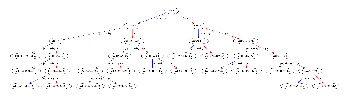

In [57]:
xgb.plot_tree(model,num_trees=0)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [58]:
preds = model.predict(test_XG)
best_preds = np.asarray([np.argmax(line) for line in preds])

In [59]:
#Decision Tree (Supervised Learning Model-1)
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)


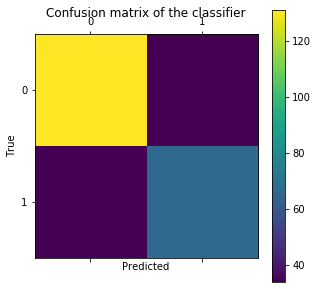

In [60]:
cm = confusion_matrix(Y_test, Y_pred)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [61]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       165
           1       0.66      0.66      0.66       101

    accuracy                           0.74       266
   macro avg       0.73      0.73      0.73       266
weighted avg       0.74      0.74      0.74       266



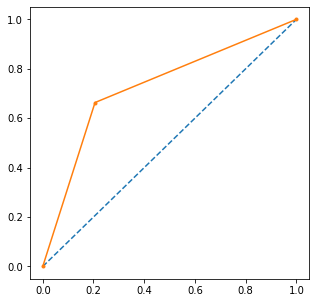

In [62]:
from sklearn.metrics import roc_auc_score, roc_curve
probs_y=decision_tree.predict_proba(X_test) 
probs = probs_y[:, 1]
auc = roc_auc_score(Y_test, probs)
fpr, tpr, thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [63]:
Y_pred = decision_tree.predict(test)

In [64]:
#k-nearest neighbors (Supervised Learning Model-2)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)

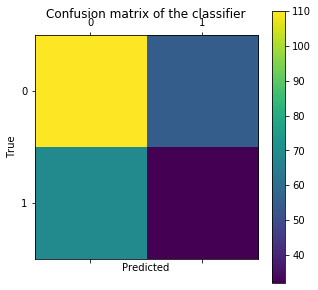

In [65]:
cm = confusion_matrix(Y_test, Y_pred)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [66]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.61      0.67      0.64       165
           1       0.37      0.32      0.34       101

    accuracy                           0.53       266
   macro avg       0.49      0.49      0.49       266
weighted avg       0.52      0.53      0.53       266



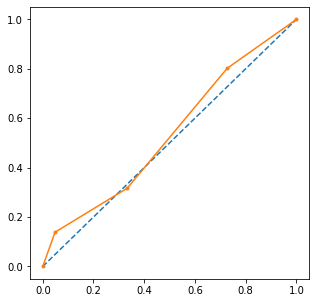

In [67]:
from sklearn.metrics import roc_auc_score, roc_curve
probs_y=knn.predict_proba(X_test) 
probs = probs_y[:, 1]
auc = roc_auc_score(Y_test, probs)
fpr, tpr, thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [68]:
Y_pred = knn.predict(test)

In [69]:
#LogisticRegression (Supervised Learning Model-3)
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)

C:\Users\vedant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


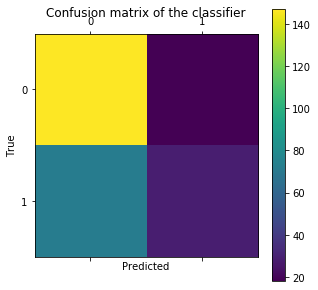

In [70]:
cm = confusion_matrix(Y_test, Y_pred)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [71]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.67      0.89      0.77       165
           1       0.62      0.29      0.39       101

    accuracy                           0.66       266
   macro avg       0.64      0.59      0.58       266
weighted avg       0.65      0.66      0.62       266



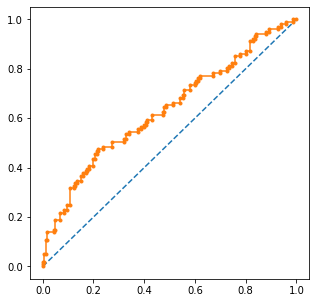

In [73]:
from sklearn.metrics import roc_auc_score, roc_curve
probs_y=logreg.predict_proba(X_test) 
probs = probs_y[:, 1]
auc = roc_auc_score(Y_test, probs)
fpr, tpr, thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [74]:
LR_Pred = logreg.predict(test)

In [75]:
# Random Forest (Supervised Learning Model-4)
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)

##### Model Evaluation: To Evaluate the model

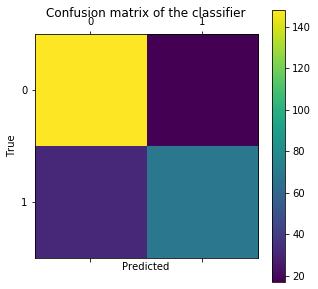

In [76]:
cm = confusion_matrix(Y_test, Y_pred)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [77]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       165
           1       0.80      0.68      0.74       101

    accuracy                           0.82       266
   macro avg       0.81      0.79      0.80       266
weighted avg       0.81      0.82      0.81       266



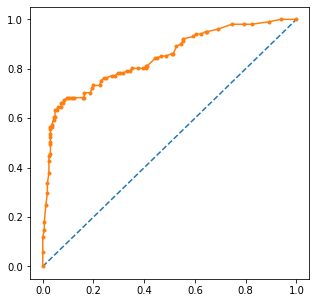

In [78]:
from sklearn.metrics import roc_auc_score, roc_curve
probs_y=random_forest.predict_proba(X_test) 
probs = probs_y[:, 1]
auc = roc_auc_score(Y_test, probs)
fpr, tpr, thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [79]:
Y_pred = random_forest.predict(test)

## Supply or submit the results.

In [80]:
submission = pd.DataFrame({"PassengerId": fi,"Survived": best_preds})


In [ ]:
submission.to_csv('XGB19.csv', encoding='utf-8', index=False)

Accuracy of each model is as follows

Decision Tree 74%

k-nearest neighbors 53%

LogisticRegression 62%

Random Forest  82%


GXBoost was giving the best result so we choose XGBoost prediction as our final prediction